# lorapy symbol viewer

In [1]:
%load_ext autoreload
%autoreload 2

import pathlib

import os, sys
from loguru import logger
logger.remove(None)
logger.add(sys.stdout, colorize=True)

import numpy as np
import pandas as pd
from six.moves import cPickle
import tqdm
from tqdm import tqdm_notebook
import warnings 
import scipy.signal as spsig
import multiprocessing
from functools import partial 

import matplotlib.pyplot as plt 
# plt.style.use('dark_background')
%matplotlib inline

In [2]:
import lorapy

## setup 

In [3]:
_BASE_DATA_DIR = pathlib.Path('../data')

BENCHTOP_DATA_DIR = _BASE_DATA_DIR.joinpath('lora-benchtop-recording')
DOTP_DATA_DIR = _BASE_DATA_DIR.joinpath('symbol-ref')
DEV_DATA_DIR = _BASE_DATA_DIR.joinpath('dev-data')
PROC_SYMBOL_DIR = _BASE_DATA_DIR.joinpath('processed-symbols')
FILT_SYMBOL_DIR = _BASE_DATA_DIR.joinpath('filtered-symbols')

# load

In [4]:
import random
import warnings 

rand = lambda mx: random.randint(0, mx - 1)

def _load_matching_dotp(bw: int, sf: int):
    return ploader.filter(bw=bw, sf=sf)[0]


def _plot_check(filtered_syms, num=20):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        fig, ax = plt.subplots(num, figsize=(14, 10))

        for idx in range(num):
            ax[idx].plot(filtered_syms[rand(filtered_syms.shape[0])])
            
            
def _format_output_path(out_dir, file):    
    out_path = out_dir.joinpath(file.name)
    return out_path


def _save_symbols(data, out_dir, file):
    out_path = _format_output_path(out_dir, file)
    
    with out_path.open('wb') as outfile:
        cPickle.dump(data, outfile)

## files

In [5]:
symloader = lorapy.load_dotp(PROC_SYMBOL_DIR)
symloader.file_list

2020-04-11 16:21:00.470 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/processed-symbols
2020-04-11 16:21:00.478 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 159 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=1 | name='lora_BW2_SF12_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=2 | name='lora_BW8_SF12_915MHz_20ksps_Att120_v0.p'),
 DotPFile(id=3 | name='lora_BW1_SF10_915MHz_20ksps_Att140_v0.p'),
 DotPFile(id=4 | name='lora_BW1_SF10_915MHz_20ksps_Att120_v1.p'),
 DotPFile(id=5 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=6 | name='lora_BW2_SF12_915MHz_20ksps_Att80_v1.p'),
 DotPFile(id=7 | name='lora_BW1_SF12_915MHz_20ksps_Att60_v0.p'),
 DotPFile(id=8 | name='lora_BW7_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=9 | name='lora_BW2_SF10_915MHz_20ksps_Att40_v0.p'),
 DotPFile(id=10 | name='lora_BW2_SF12_915MHz_20ksps_Att60_v1.p'),
 DotPFile(id=11 | name='lora_BW2_SF10_915MHz_20ksps_Att140_v1.p'),
 DotPFile(id=12 | name='lora_BW1_SF10_915MHz_20ksps_Att40_v1.p'),
 DotPFile(id=13 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=14 | name='lora_BW2_SF12_915MHz_20ksps_Att60_v0.p'),
 DotPFile(id=15 | n

In [6]:
ploader = lorapy.load_dotp(DOTP_DATA_DIR)
ploader.file_list

2020-04-11 16:21:00.514 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/symbol-ref
2020-04-11 16:21:00.516 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 15 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=1 | name='lora_BW1_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=2 | name='lora_BW9_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=3 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=4 | name='lora_BW9_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=5 | name='lora_BW2_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=6 | name='lora_BW8_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=7 | name='lora_BW7_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=8 | name='lora_BW8_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=9 | name='lora_BW8_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=10 | name='lora_BW1_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=11 | name='lora_BW2_SF11_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=12 | name='lora_BW9_SF10_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=13 | name='lora_BW7_SF12_915MHz_20ksps_Att0_v0.p'),
 DotPFile(id=14 | name='lora_BW7_SF11_915MHz_20ksps_Att0_v0.p')]

## missing files

## new files

In [12]:
new_filenames = [
    'lora_BW1_SF10_915MHz_20ksps_Att0_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att100_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att120_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att140_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att20_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att40_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att60_v1.p', 
    'lora_BW1_SF10_915MHz_20ksps_Att80_v1.p', 
    'lora_BW1_SF11_915MHz_20kspsAtt120_v1.p', 
    'lora_BW1_SF11_915MHz_20kspsAtt140_v1.p', 
    'lora_BW1_SF11_915MHz_20ksps_Att0_v1.p', 
    'lora_BW1_SF11_915MHz_20ksps_Att100_v1.p', 
    'lora_BW1_SF11_915MHz_20ksps_Att20_v1.p', 
    'lora_BW1_SF11_915MHz_20ksps_Att40_v1.p', 
    'lora_BW1_SF11_915MHz_20ksps_Att60_v1.p', 
    'lora_BW1_SF11_915MHz_20ksps_Att80_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt0_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt0_v2.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt100_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt120_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt140_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt20_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt40_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt60_v1.p', 
    'lora_BW1_SF12_915MHz_20kspsAtt80_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att0_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att100_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att120_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att140_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att20_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att40_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att60_v1.p', 
    'lora_BW2_SF10_915MHz_20ksps_Att80_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att0_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att100_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att120_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att140_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att20_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att40_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att60_v1.p', 
    'lora_BW2_SF11_915MHz_20ksps_Att80_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att0_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att100_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att120_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att140_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att20_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att40_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att60_v1.p', 
    'lora_BW2_SF12_915MHz_20ksps_Att80_v1.p', 
]

## symbols

In [ ]:
file = symloader.select(101)
file.load()
display(file)

pfile = _load_matching_dotp(file.bw, file.sf)
display(pfile)

base_symbol = pfile.to_signal()
display(base_symbol)

symbols = file.to_signal()
display(symbols)

# symbol filtering

In [8]:
def _fft_convolve_autocorr(symbol: np.ndarray):
    return spsig.fftconvolve(symbol, symbol[::-1], mode='full')

def _sp_corr(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))
    corr = spsig.correlate(base_symbol, packet_slice)
    return np.abs(corr.max())
    
def _compute_corr(symbol: np.ndarray, base_symbol: np.ndarray) -> float:
    return _sp_corr(base_symbol, _fft_convolve_autocorr(symbol))

def _mp_compute_corr(base_sym: np.ndarray, symbols: np.ndarray) -> np.ndarray:
    logger.warning(f'beginning multiprocessing..')
    _part_compute_corr = partial(_compute_corr, base_symbol=base_sym)    

    with multiprocessing.Pool() as pool:
        results = pool.map(_part_compute_corr, symbols)
    
    logger.warning(f'completed multiprocessing')
    return np.array(results)
    

def filter_symbols_fftcorr(file, thresh_adj=0.4, mp=True, plot=False):
    symbols = file.to_signal()
    display(symbols)

    pfile = _load_matching_dotp(file.bw, file.sf)
    base_symbol = pfile.to_signal()
    display(base_symbol)
    
    if mp:
        corr_fftconvs = _mp_compute_corr(base_symbol.data, symbols.data)
    else:    
        corr_fftconvs = np.array([
            _compute_corr(sym, base_symbol.data)
            for sym in symbols.data
        ])
    
    thresh = corr_fftconvs.mean() 
    thresh *= thresh_adj
    logger.info(f'set threshold: {thresh:0.6f}')
    
    filtered_symbols = symbols.data[np.where(corr_fftconvs > thresh)[0], :]
    _rm_symbols = symbols.data[np.where(corr_fftconvs < thresh)[0], :]
   
    _removed_syms = symbols.data.shape[0] - len(filtered_symbols)
    logger.warning(f'removed {_removed_syms} symbols  [{len(filtered_symbols)} / {symbols.data.shape[0]}]')
    
    if plot:
        _plot_check(filtered_symbols, 40)
        
#     return filtered_symbols, _rm_symbols, corr_fftconvs
    return filtered_symbols


In [14]:
THRESH_ADJ = 0.4


# for file in tqdm.tqdm(symloader.file_list):
for file in tqdm.tqdm(file for file in symloader.file_list if file.name in new_filenames):
    logger.warning(f'working file {file}')
    file.load()
    if file.bw > 6 and file.att > 100:
        continue
    
    filtered_symbols = filter_symbols_fftcorr(file, thresh_adj=THRESH_ADJ, mp=True, plot=False)
    _save_symbols(filtered_symbols, FILT_SYMBOL_DIR, file)
    

0it [00:00, ?it/s]

2020-04-11 16:23:30.672 | WARNING  | __main__:<module>:6 - working file DotPFile(id=4 | name='lora_BW1_SF10_915MHz_20ksps_Att120_v1.p')
2020-04-11 16:23:30.674 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:23:30.976 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10770078 samples from file


BaselineSymbolSet(num symbols=561 | BW: 1 | SF: 10 | Att: 120 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:23:30.980 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:23:30.982 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:23:30.985 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:31.799 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:31.803 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.001041
2020-04-11 16:23:31.875 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 1 symbols  [560 / 561]


1it [00:01,  1.37s/it]

2020-04-11 16:23:32.045 | WARNING  | __main__:<module>:6 - working file DotPFile(id=6 | name='lora_BW2_SF12_915MHz_20ksps_Att80_v1.p')
2020-04-11 16:23:32.046 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:23:32.462 | INFO     | lorapy.datafile._base_file:load:61 - loaded 13516008 samples from file


BaselineSymbolSet(num symbols=264 | BW: 2 | SF: 12 | Att: 80 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:23:32.467 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:23:32.470 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:23:32.472 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:33.861 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:33.864 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 1.405627
2020-04-11 16:23:34.065 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [264 / 264]


2it [00:03,  1.62s/it]

2020-04-11 16:23:34.260 | WARNING  | __main__:<module>:6 - working file DotPFile(id=10 | name='lora_BW2_SF12_915MHz_20ksps_Att60_v1.p')
2020-04-11 16:23:34.262 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:23:34.550 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12389674 samples from file


BaselineSymbolSet(num symbols=242 | BW: 2 | SF: 12 | Att: 60 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:23:34.554 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:23:34.555 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:23:34.557 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:35.760 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:35.763 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 141.747156
2020-04-11 16:23:35.827 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [242 / 242]


3it [00:05,  1.66s/it]

2020-04-11 16:23:36.003 | WARNING  | __main__:<module>:6 - working file DotPFile(id=11 | name='lora_BW2_SF10_915MHz_20ksps_Att140_v1.p')
2020-04-11 16:23:36.004 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:23:36.235 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10843294 samples from file


BaselineSymbolSet(num symbols=847 | BW: 2 | SF: 10 | Att: 140 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:23:36.240 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:23:36.241 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:23:36.244 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:37.155 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:37.158 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.000579
2020-04-11 16:23:37.198 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 15 symbols  [832 / 847]


4it [00:06,  1.57s/it]

2020-04-11 16:23:37.360 | WARNING  | __main__:<module>:6 - working file DotPFile(id=12 | name='lora_BW1_SF10_915MHz_20ksps_Att40_v1.p')
2020-04-11 16:23:37.361 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:23:37.721 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12325116 samples from file


BaselineSymbolSet(num symbols=642 | BW: 1 | SF: 10 | Att: 40 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:23:37.725 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:23:37.727 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:23:37.729 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:38.666 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:38.669 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 7908.153125
2020-04-11 16:23:38.711 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [642 / 642]


5it [00:08,  1.56s/it]

2020-04-11 16:23:38.894 | WARNING  | __main__:<module>:6 - working file DotPFile(id=18 | name='lora_BW2_SF11_915MHz_20ksps_Att140_v1.p')
2020-04-11 16:23:38.896 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:23:39.462 | INFO     | lorapy.datafile._base_file:load:61 - loaded 11393780 samples from file


BaselineSymbolSet(num symbols=445 | BW: 2 | SF: 11 | Att: 140 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:23:39.467 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:23:39.469 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:23:39.471 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:40.914 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:40.917 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.001642
2020-04-11 16:23:41.141 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [445 / 445]


6it [00:10,  1.87s/it]

2020-04-11 16:23:41.482 | WARNING  | __main__:<module>:6 - working file DotPFile(id=20 | name='lora_BW1_SF11_915MHz_20ksps_Att100_v1.p')
2020-04-11 16:23:41.483 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:23:42.208 | INFO     | lorapy.datafile._base_file:load:61 - loaded 13093036 samples from file


BaselineSymbolSet(num symbols=341 | BW: 1 | SF: 11 | Att: 100 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:23:42.212 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:23:42.214 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:23:42.217 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:44.108 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:44.112 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.013316
2020-04-11 16:23:44.298 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [341 / 341]


7it [00:13,  2.26s/it]

2020-04-11 16:23:44.658 | WARNING  | __main__:<module>:6 - working file DotPFile(id=21 | name='lora_BW1_SF12_915MHz_20kspsAtt20_v1.p')
2020-04-11 16:23:44.660 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:23:45.937 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12288160 samples from file


BaselineSymbolSet(num symbols=160 | BW: 1 | SF: 12 | Att: 20 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:23:45.942 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:23:45.945 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:23:45.947 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:48.270 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:48.274 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 1548172.245039
2020-04-11 16:23:48.565 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [160 / 160]


8it [00:18,  2.86s/it]

2020-04-11 16:23:48.906 | WARNING  | __main__:<module>:6 - working file DotPFile(id=26 | name='lora_BW2_SF11_915MHz_20ksps_Att40_v1.p')
2020-04-11 16:23:48.907 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:23:49.120 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12494752 samples from file


BaselineSymbolSet(num symbols=488 | BW: 2 | SF: 11 | Att: 40 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:23:49.125 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:23:49.127 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:23:49.129 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:50.292 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:50.295 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 7072.663281
2020-04-11 16:23:50.345 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [488 / 488]


9it [00:19,  2.49s/it]

2020-04-11 16:23:50.537 | WARNING  | __main__:<module>:6 - working file DotPFile(id=30 | name='lora_BW1_SF11_915MHz_20ksps_Att0_v1.p')
2020-04-11 16:23:50.539 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:23:50.810 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12209928 samples from file


BaselineSymbolSet(num symbols=318 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:23:50.814 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:23:50.816 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:23:50.819 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:51.965 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:51.968 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 918288.100000
2020-04-11 16:23:52.025 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [318 / 318]


10it [00:21,  2.25s/it]

2020-04-11 16:23:52.214 | WARNING  | __main__:<module>:6 - working file DotPFile(id=31 | name='lora_BW1_SF12_915MHz_20kspsAtt100_v1.p')
2020-04-11 16:23:52.216 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:23:52.494 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12672165 samples from file


BaselineSymbolSet(num symbols=165 | BW: 1 | SF: 12 | Att: 100 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:23:52.499 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:23:52.501 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:23:52.504 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:54.009 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:54.012 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.021561
2020-04-11 16:23:54.057 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [165 / 165]


11it [00:23,  2.18s/it]

2020-04-11 16:23:54.238 | WARNING  | __main__:<module>:6 - working file DotPFile(id=32 | name='lora_BW2_SF12_915MHz_20ksps_Att140_v1.p')
2020-04-11 16:23:54.240 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:23:54.462 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10956158 samples from file


BaselineSymbolSet(num symbols=214 | BW: 2 | SF: 12 | Att: 140 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:23:54.467 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:23:54.468 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:23:54.471 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:55.818 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:55.821 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.001744
2020-04-11 16:23:55.868 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 3 symbols  [211 / 214]


12it [00:25,  2.06s/it]

2020-04-11 16:23:56.022 | WARNING  | __main__:<module>:6 - working file DotPFile(id=33 | name='lora_BW1_SF12_915MHz_20kspsAtt0_v1.p')
2020-04-11 16:23:56.024 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:23:56.293 | INFO     | lorapy.datafile._base_file:load:61 - loaded 13516976 samples from file


BaselineSymbolSet(num symbols=176 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:23:56.298 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:23:56.300 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:23:56.302 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:58.094 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:58.097 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 1956808.800000
2020-04-11 16:23:58.156 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [176 / 176]


13it [00:27,  2.14s/it]

2020-04-11 16:23:58.360 | WARNING  | __main__:<module>:6 - working file DotPFile(id=34 | name='lora_BW2_SF10_915MHz_20ksps_Att120_v1.p')
2020-04-11 16:23:58.362 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:23:58.536 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10190392 samples from file


BaselineSymbolSet(num symbols=796 | BW: 2 | SF: 10 | Att: 120 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:23:58.540 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:23:58.542 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:23:58.544 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:23:59.725 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:23:59.729 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.000520
2020-04-11 16:23:59.780 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 20 symbols  [776 / 796]


14it [00:29,  1.97s/it]

2020-04-11 16:23:59.939 | WARNING  | __main__:<module>:6 - working file DotPFile(id=36 | name='lora_BW1_SF11_915MHz_20ksps_Att80_v1.p')
2020-04-11 16:23:59.941 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:24:00.172 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10136544 samples from file


BaselineSymbolSet(num symbols=264 | BW: 1 | SF: 11 | Att: 80 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:24:00.176 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:24:00.178 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:24:00.180 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:01.463 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:01.466 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 1.614491
2020-04-11 16:24:01.506 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [264 / 264]


15it [00:30,  1.90s/it]

2020-04-11 16:24:01.652 | WARNING  | __main__:<module>:6 - working file DotPFile(id=40 | name='lora_BW2_SF10_915MHz_20ksps_Att100_v1.p')
2020-04-11 16:24:01.653 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:24:01.884 | INFO     | lorapy.datafile._base_file:load:61 - loaded 11765038 samples from file


BaselineSymbolSet(num symbols=919 | BW: 2 | SF: 10 | Att: 100 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:24:01.889 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:24:01.891 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:24:01.893 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:03.097 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:03.100 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.003470
2020-04-11 16:24:03.163 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [919 / 919]


16it [00:32,  1.84s/it]

2020-04-11 16:24:03.356 | WARNING  | __main__:<module>:6 - working file DotPFile(id=43 | name='lora_BW1_SF12_915MHz_20kspsAtt0_v2.p')
2020-04-11 16:24:03.357 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:03.703 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12672165 samples from file


BaselineSymbolSet(num symbols=165 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:03.708 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:03.710 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:03.712 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:05.328 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:05.331 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 1959435.800000
2020-04-11 16:24:05.376 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [165 / 165]


17it [00:34,  1.95s/it]

2020-04-11 16:24:05.551 | WARNING  | __main__:<module>:6 - working file DotPFile(id=51 | name='lora_BW2_SF10_915MHz_20ksps_Att60_v1.p')
2020-04-11 16:24:05.553 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:24:06.155 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12136296 samples from file


BaselineSymbolSet(num symbols=948 | BW: 2 | SF: 10 | Att: 60 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:24:06.159 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:24:06.160 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:24:06.162 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:07.620 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:07.623 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 34.445450
2020-04-11 16:24:07.738 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [948 / 948]


18it [00:37,  2.15s/it]

2020-04-11 16:24:08.185 | WARNING  | __main__:<module>:6 - working file DotPFile(id=54 | name='lora_BW1_SF12_915MHz_20kspsAtt40_v1.p')
2020-04-11 16:24:08.186 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:08.838 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12672165 samples from file


BaselineSymbolSet(num symbols=165 | BW: 1 | SF: 12 | Att: 40 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:08.843 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:08.845 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:08.848 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:11.284 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:11.287 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 32268.132958
2020-04-11 16:24:11.374 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [165 / 165]


19it [00:41,  2.56s/it]

2020-04-11 16:24:11.706 | WARNING  | __main__:<module>:6 - working file DotPFile(id=61 | name='lora_BW1_SF11_915MHz_20ksps_Att60_v1.p')
2020-04-11 16:24:11.707 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:24:11.930 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10558900 samples from file


BaselineSymbolSet(num symbols=275 | BW: 1 | SF: 11 | Att: 60 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:24:11.935 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:24:11.937 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:24:11.939 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:13.166 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:13.169 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 164.333752
2020-04-11 16:24:13.208 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [275 / 275]


20it [00:42,  2.29s/it]

2020-04-11 16:24:13.359 | WARNING  | __main__:<module>:6 - working file DotPFile(id=62 | name='lora_BW1_SF10_915MHz_20ksps_Att60_v1.p')
2020-04-11 16:24:13.360 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:13.833 | INFO     | lorapy.datafile._base_file:load:61 - loaded 11537998 samples from file


BaselineSymbolSet(num symbols=601 | BW: 1 | SF: 10 | Att: 60 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:13.838 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:13.840 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:13.843 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:15.471 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:15.475 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 78.183775
2020-04-11 16:24:15.584 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [601 / 601]


21it [00:45,  2.38s/it]

2020-04-11 16:24:15.936 | WARNING  | __main__:<module>:6 - working file DotPFile(id=71 | name='lora_BW2_SF12_915MHz_20ksps_Att0_v1.p')
2020-04-11 16:24:15.937 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:24:16.180 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12799250 samples from file


BaselineSymbolSet(num symbols=250 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:24:16.185 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:24:16.187 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:24:16.189 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:17.676 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:17.679 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 816058.200000
2020-04-11 16:24:17.734 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [250 / 250]


22it [00:47,  2.26s/it]

2020-04-11 16:24:17.940 | WARNING  | __main__:<module>:6 - working file DotPFile(id=72 | name='lora_BW1_SF12_915MHz_20kspsAtt80_v1.p')
2020-04-11 16:24:17.942 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:18.563 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12672165 samples from file


BaselineSymbolSet(num symbols=165 | BW: 1 | SF: 12 | Att: 80 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:18.568 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:18.570 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:18.572 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:20.920 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:20.923 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 2.998536
2020-04-11 16:24:21.021 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [165 / 165]


23it [00:50,  2.61s/it]

2020-04-11 16:24:21.365 | WARNING  | __main__:<module>:6 - working file DotPFile(id=76 | name='lora_BW2_SF11_915MHz_20ksps_Att120_v1.p')
2020-04-11 16:24:21.367 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:21.821 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10907304 samples from file


BaselineSymbolSet(num symbols=426 | BW: 2 | SF: 11 | Att: 120 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:21.825 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:21.827 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:21.830 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:23.449 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:23.452 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.001505
2020-04-11 16:24:23.568 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [426 / 426]


24it [00:53,  2.58s/it]

2020-04-11 16:24:23.861 | WARNING  | __main__:<module>:6 - working file DotPFile(id=78 | name='lora_BW2_SF11_915MHz_20ksps_Att0_v1.p')
2020-04-11 16:24:23.862 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:24.613 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12750792 samples from file


BaselineSymbolSet(num symbols=498 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:24.617 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:24.619 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:24.621 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:26.857 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:26.861 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 408298.768535
2020-04-11 16:24:27.125 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [498 / 498]


25it [00:56,  2.89s/it]

2020-04-11 16:24:27.465 | WARNING  | __main__:<module>:6 - working file DotPFile(id=79 | name='lora_BW2_SF11_915MHz_20ksps_Att60_v1.p')
2020-04-11 16:24:27.467 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:28.271 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12673980 samples from file


BaselineSymbolSet(num symbols=495 | BW: 2 | SF: 11 | Att: 60 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:28.276 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:28.278 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:28.280 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:30.362 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:30.366 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 70.210328
2020-04-11 16:24:30.661 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [495 / 495]


26it [01:00,  3.11s/it]

2020-04-11 16:24:31.092 | WARNING  | __main__:<module>:6 - working file DotPFile(id=83 | name='lora_BW1_SF10_915MHz_20ksps_Att100_v1.p')
2020-04-11 16:24:31.094 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:31.852 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12536294 samples from file


BaselineSymbolSet(num symbols=653 | BW: 1 | SF: 10 | Att: 100 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:31.858 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:31.860 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:31.863 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:33.920 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:33.923 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.007984
2020-04-11 16:24:34.182 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [653 / 653]


27it [01:03,  3.20s/it]

2020-04-11 16:24:34.504 | WARNING  | __main__:<module>:6 - working file DotPFile(id=85 | name='lora_BW1_SF11_915MHz_20ksps_Att40_v1.p')
2020-04-11 16:24:34.505 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:24:34.764 | INFO     | lorapy.datafile._base_file:load:61 - loaded 13093036 samples from file


BaselineSymbolSet(num symbols=341 | BW: 1 | SF: 11 | Att: 40 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:24:34.769 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:24:34.771 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:24:34.774 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:36.485 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:36.488 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 16007.823438
2020-04-11 16:24:36.548 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [341 / 341]


28it [01:06,  2.91s/it]

2020-04-11 16:24:36.753 | WARNING  | __main__:<module>:6 - working file DotPFile(id=86 | name='lora_BW1_SF10_915MHz_20ksps_Att0_v1.p')
2020-04-11 16:24:36.754 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:37.525 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12497898 samples from file


BaselineSymbolSet(num symbols=651 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:37.530 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:37.531 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:37.533 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:39.671 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:39.674 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 445502.461753
2020-04-11 16:24:39.955 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [651 / 651]


29it [01:09,  3.16s/it]

2020-04-11 16:24:40.493 | WARNING  | __main__:<module>:6 - working file DotPFile(id=88 | name='lora_BW2_SF12_915MHz_20ksps_Att120_v1.p')
2020-04-11 16:24:40.494 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:24:41.182 | INFO     | lorapy.datafile._base_file:load:61 - loaded 10495385 samples from file


BaselineSymbolSet(num symbols=205 | BW: 2 | SF: 12 | Att: 120 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:24:41.187 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:24:41.189 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:24:41.191 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:43.501 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:43.505 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.001517
2020-04-11 16:24:43.809 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 9 symbols  [196 / 205]


30it [01:13,  3.30s/it]

2020-04-11 16:24:44.106 | WARNING  | __main__:<module>:6 - working file DotPFile(id=89 | name='lora_BW1_SF12_915MHz_20kspsAtt60_v1.p')
2020-04-11 16:24:44.107 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:45.214 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12672165 samples from file


BaselineSymbolSet(num symbols=165 | BW: 1 | SF: 12 | Att: 60 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:45.218 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:45.220 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:45.222 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:48.214 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:48.218 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 308.707005
2020-04-11 16:24:48.323 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [165 / 165]


31it [01:18,  3.68s/it]

2020-04-11 16:24:48.688 | WARNING  | __main__:<module>:6 - working file DotPFile(id=95 | name='lora_BW2_SF11_915MHz_20ksps_Att100_v1.p')
2020-04-11 16:24:48.689 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:49.219 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12392336 samples from file


BaselineSymbolSet(num symbols=484 | BW: 2 | SF: 11 | Att: 100 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:49.224 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:24:49.226 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:24:49.228 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:51.241 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:51.245 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.006605
2020-04-11 16:24:51.458 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [484 / 484]


32it [01:21,  3.51s/it]

2020-04-11 16:24:51.793 | WARNING  | __main__:<module>:6 - working file DotPFile(id=98 | name='lora_BW1_SF10_915MHz_20ksps_Att80_v1.p')
2020-04-11 16:24:51.795 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:52.037 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12056344 samples from file


BaselineSymbolSet(num symbols=628 | BW: 1 | SF: 10 | Att: 80 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:52.042 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:24:52.044 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:24:52.046 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:53.843 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:53.847 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.785725
2020-04-11 16:24:53.975 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [628 / 628]


33it [01:23,  3.16s/it]

2020-04-11 16:24:54.151 | WARNING  | __main__:<module>:6 - working file DotPFile(id=106 | name='lora_BW1_SF12_915MHz_20kspsAtt140_v1.p')
2020-04-11 16:24:54.153 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:54.852 | INFO     | lorapy.datafile._base_file:load:61 - loaded 11136145 samples from file


BaselineSymbolSet(num symbols=145 | BW: 1 | SF: 12 | Att: 140 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:54.857 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:24:54.859 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:24:54.862 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:24:57.851 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:24:57.855 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.008381
2020-04-11 16:24:57.928 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [145 / 145]


34it [01:27,  3.43s/it]

2020-04-11 16:24:58.201 | WARNING  | __main__:<module>:6 - working file DotPFile(id=107 | name='lora_BW2_SF10_915MHz_20ksps_Att0_v1.p')
2020-04-11 16:24:58.202 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:24:58.426 | INFO     | lorapy.datafile._base_file:load:61 - loaded 11624216 samples from file


BaselineSymbolSet(num symbols=908 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:24:58.430 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:24:58.432 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:24:58.434 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:00.137 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:00.141 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 199436.262500
2020-04-11 16:25:00.184 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [908 / 908]


35it [01:29,  3.04s/it]

2020-04-11 16:25:00.344 | WARNING  | __main__:<module>:6 - working file DotPFile(id=108 | name='lora_BW2_SF12_915MHz_20ksps_Att40_v1.p')
2020-04-11 16:25:00.345 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:25:01.218 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12952841 samples from file


BaselineSymbolSet(num symbols=253 | BW: 2 | SF: 12 | Att: 40 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:25:01.223 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:25:01.225 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:25:01.227 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:04.185 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:04.188 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 14267.999675
2020-04-11 16:25:04.287 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [253 / 253]


36it [01:33,  3.41s/it]

2020-04-11 16:25:04.611 | WARNING  | __main__:<module>:6 - working file DotPFile(id=116 | name='lora_BW1_SF11_915MHz_20kspsAtt120_v1.p')
2020-04-11 16:25:04.612 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:25:04.776 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8754288 samples from file


BaselineSymbolSet(num symbols=228 | BW: 1 | SF: 11 | Att: 120 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:25:04.780 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:25:04.781 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:25:04.783 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:06.591 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:06.595 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.003108
2020-04-11 16:25:06.635 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [228 / 228]


37it [01:36,  3.04s/it]

2020-04-11 16:25:06.773 | WARNING  | __main__:<module>:6 - working file DotPFile(id=119 | name='lora_BW1_SF12_915MHz_20kspsAtt120_v1.p')
2020-04-11 16:25:06.775 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:25:07.214 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9907329 samples from file


BaselineSymbolSet(num symbols=129 | BW: 1 | SF: 12 | Att: 120 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:25:07.220 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 76801 and packet length: 2323230
2020-04-11 16:25:07.222 | INFO     | lorapy.datafile._base_file:load:61 - loaded 76800 samples from file


BaselineSymbolSet(num symbols=76800 | BW: 1 | SF: 12 | Att: 0 | samples per symbol: 76801 | packet length: 2323230)

2020-04-11 16:25:07.225 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:10.347 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:10.350 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.006976
2020-04-11 16:25:10.436 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [129 / 129]


38it [01:40,  3.31s/it]

2020-04-11 16:25:10.730 | WARNING  | __main__:<module>:6 - working file DotPFile(id=126 | name='lora_BW2_SF12_915MHz_20ksps_Att100_v1.p')
2020-04-11 16:25:10.731 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:25:11.200 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12338477 samples from file


BaselineSymbolSet(num symbols=241 | BW: 2 | SF: 12 | Att: 100 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:25:11.204 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:25:11.205 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:25:11.208 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:13.797 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:13.801 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.012997
2020-04-11 16:25:13.911 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [241 / 241]


39it [01:43,  3.38s/it]

2020-04-11 16:25:14.276 | WARNING  | __main__:<module>:6 - working file DotPFile(id=132 | name='lora_BW2_SF11_915MHz_20ksps_Att80_v1.p')
2020-04-11 16:25:14.278 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:25:14.568 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12904416 samples from file


BaselineSymbolSet(num symbols=504 | BW: 2 | SF: 11 | Att: 80 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:25:14.573 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:25:14.575 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:25:14.577 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:16.587 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:16.591 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.695247
2020-04-11 16:25:16.705 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [504 / 504]


40it [01:46,  3.15s/it]

2020-04-11 16:25:16.881 | WARNING  | __main__:<module>:6 - working file DotPFile(id=134 | name='lora_BW1_SF10_915MHz_20ksps_Att20_v1.p')
2020-04-11 16:25:16.882 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:25:17.146 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12497898 samples from file


BaselineSymbolSet(num symbols=651 | BW: 1 | SF: 10 | Att: 20 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:25:17.150 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:25:17.151 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:25:17.153 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:19.085 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:19.088 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 363076.100000
2020-04-11 16:25:19.232 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [651 / 651]


41it [01:48,  2.96s/it]

2020-04-11 16:25:19.393 | WARNING  | __main__:<module>:6 - working file DotPFile(id=136 | name='lora_BW2_SF10_915MHz_20ksps_Att20_v1.p')
2020-04-11 16:25:19.394 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:25:20.272 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12417940 samples from file


BaselineSymbolSet(num symbols=970 | BW: 2 | SF: 10 | Att: 20 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:25:20.276 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:25:20.277 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:25:20.279 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:22.265 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:22.268 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 164744.244231
2020-04-11 16:25:22.401 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [970 / 970]


42it [01:52,  3.14s/it]

2020-04-11 16:25:22.957 | WARNING  | __main__:<module>:6 - working file DotPFile(id=137 | name='lora_BW2_SF10_915MHz_20ksps_Att40_v1.p')
2020-04-11 16:25:22.958 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:25:23.710 | INFO     | lorapy.datafile._base_file:load:61 - loaded 11534602 samples from file


BaselineSymbolSet(num symbols=901 | BW: 2 | SF: 10 | Att: 40 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:25:23.714 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:25:23.716 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:25:23.718 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:25.974 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:25.977 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 3437.539825
2020-04-11 16:25:26.216 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [901 / 901]


43it [01:55,  3.28s/it]

2020-04-11 16:25:26.575 | WARNING  | __main__:<module>:6 - working file DotPFile(id=138 | name='lora_BW2_SF11_915MHz_20ksps_Att20_v1.p')
2020-04-11 16:25:26.577 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:25:27.466 | INFO     | lorapy.datafile._base_file:load:61 - loaded 13314080 samples from file


BaselineSymbolSet(num symbols=520 | BW: 2 | SF: 11 | Att: 20 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:25:27.472 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 25604 and packet length: 774521
2020-04-11 16:25:27.473 | INFO     | lorapy.datafile._base_file:load:61 - loaded 25603 samples from file


BaselineSymbolSet(num symbols=25603 | BW: 2 | SF: 11 | Att: 0 | samples per symbol: 25604 | packet length: 774521)

2020-04-11 16:25:27.475 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:29.966 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:29.969 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 335494.920645
2020-04-11 16:25:30.164 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [520 / 520]


44it [02:00,  3.55s/it]

2020-04-11 16:25:30.744 | WARNING  | __main__:<module>:6 - working file DotPFile(id=144 | name='lora_BW1_SF11_915MHz_20ksps_Att20_v1.p')
2020-04-11 16:25:30.746 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:25:31.753 | INFO     | lorapy.datafile._base_file:load:61 - loaded 13093036 samples from file


BaselineSymbolSet(num symbols=341 | BW: 1 | SF: 11 | Att: 20 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:25:31.758 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:25:31.760 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:25:31.762 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:34.366 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:34.370 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 744286.800960
2020-04-11 16:25:34.478 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [341 / 341]


45it [02:04,  3.72s/it]

2020-04-11 16:25:34.874 | WARNING  | __main__:<module>:6 - working file DotPFile(id=147 | name='lora_BW1_SF10_915MHz_20ksps_Att140_v1.p')
2020-04-11 16:25:34.875 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:25:35.627 | INFO     | lorapy.datafile._base_file:load:61 - loaded 8715892 samples from file


BaselineSymbolSet(num symbols=454 | BW: 1 | SF: 10 | Att: 140 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:25:35.631 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739
2020-04-11 16:25:35.632 | INFO     | lorapy.datafile._base_file:load:61 - loaded 19197 samples from file


BaselineSymbolSet(num symbols=19197 | BW: 1 | SF: 10 | Att: 0 | samples per symbol: 19198 | packet length: 580739)

2020-04-11 16:25:35.635 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:37.947 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:37.951 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.001120
2020-04-11 16:25:38.024 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [454 / 454]


46it [02:07,  3.63s/it]

2020-04-11 16:25:38.283 | WARNING  | __main__:<module>:6 - working file DotPFile(id=154 | name='lora_BW2_SF12_915MHz_20ksps_Att20_v1.p')
2020-04-11 16:25:38.284 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:25:39.140 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12952841 samples from file


BaselineSymbolSet(num symbols=253 | BW: 2 | SF: 12 | Att: 20 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:25:39.145 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 51197 and packet length: 1548709
2020-04-11 16:25:39.147 | INFO     | lorapy.datafile._base_file:load:61 - loaded 51197 samples from file


BaselineSymbolSet(num symbols=51197 | BW: 2 | SF: 12 | Att: 0 | samples per symbol: 51197 | packet length: 1548709)

2020-04-11 16:25:39.149 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:42.258 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:42.261 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 675362.736378
2020-04-11 16:25:42.351 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [253 / 253]


47it [02:12,  3.86s/it]

2020-04-11 16:25:42.686 | WARNING  | __main__:<module>:6 - working file DotPFile(id=155 | name='lora_BW1_SF11_915MHz_20kspsAtt140_v1.p')
2020-04-11 16:25:42.688 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:25:42.873 | INFO     | lorapy.datafile._base_file:load:61 - loaded 9982960 samples from file


BaselineSymbolSet(num symbols=260 | BW: 1 | SF: 11 | Att: 140 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:25:42.877 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 38396 and packet length: 1161479
2020-04-11 16:25:42.879 | INFO     | lorapy.datafile._base_file:load:61 - loaded 38395 samples from file


BaselineSymbolSet(num symbols=38395 | BW: 1 | SF: 11 | Att: 0 | samples per symbol: 38396 | packet length: 1161479)

2020-04-11 16:25:42.881 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:44.989 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:44.992 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.002639
2020-04-11 16:25:45.048 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [260 / 260]


48it [02:14,  3.45s/it]

2020-04-11 16:25:45.189 | WARNING  | __main__:<module>:6 - working file DotPFile(id=158 | name='lora_BW2_SF10_915MHz_20ksps_Att80_v1.p')
2020-04-11 16:25:45.190 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:25:45.773 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12277118 samples from file


BaselineSymbolSet(num symbols=959 | BW: 2 | SF: 10 | Att: 80 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:25:45.777 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 12802 and packet length: 387260
2020-04-11 16:25:45.778 | INFO     | lorapy.datafile._base_file:load:61 - loaded 12801 samples from file


BaselineSymbolSet(num symbols=12801 | BW: 2 | SF: 10 | Att: 0 | samples per symbol: 12802 | packet length: 387260)

2020-04-11 16:25:45.780 | WARNING  | __main__:_mp_compute_corr:13 - beginning multiprocessing..
2020-04-11 16:25:48.106 | WARNING  | __main__:_mp_compute_corr:19 - completed multiprocessing
2020-04-11 16:25:48.110 | INFO     | __main__:filter_symbols_fftcorr:41 - set threshold: 0.344224
2020-04-11 16:25:48.314 | WARNING  | __main__:filter_symbols_fftcorr:47 - removed 0 symbols  [959 / 959]


49it [02:18,  2.83s/it]


# additional filtering

In [ ]:
file.name

## new fft autocorr

In [ ]:
%%time
THRESH_ADJ = 0.4

filtered_symbols, _rm_symbols, corr_fftconvs = filter_symbols_fftcorr(
    file, thresh_adj=THRESH_ADJ, mp=True, plot=False
)

In [ ]:
filtered_symbols.shape, corr_fftconvs.shape

In [ ]:
filtered_symbols = symbols.data[np.where(corr_fftconvs > 0.4 * corr_fftconvs.mean())[0], :]
filtered_symbols.shape

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0].hist(corr_fftconvs, bins=50)
    ax[1].hist(corr_fftconvs, bins=50, cumulative=True, density=True)
    ax[0].set_title(f'adjusted mean: {corr_fftconvs.mean() * THRESH_ADJ:0.5f}')


# filtered symbol viewing

In [50]:
AGG_SYMBOL_DIR = _BASE_DATA_DIR.joinpath('aggregated-symbols')

## setup

In [51]:
filtloader = lorapy.load_dotp(AGG_SYMBOL_DIR)  # glob_pattern='**/*v[12]*.p'
filtloader.file_list

2020-04-11 17:19:20.429 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: ../data/aggregated-symbols
2020-04-11 17:19:20.432 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 1 data file(s)


[DotPFile(id=0 | name='lora_BW1_SF10_915MHz_20ksps_Att0_combined.p')]

In [52]:
file = filtloader.select(0).load()
display(file)

sym = file.to_signal()
display(sym)
display(sym.data.shape)

2020-04-11 17:19:27.975 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 19198 and packet length: 580739


AttributeError: 'NoneType' object has no attribute 'size'

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


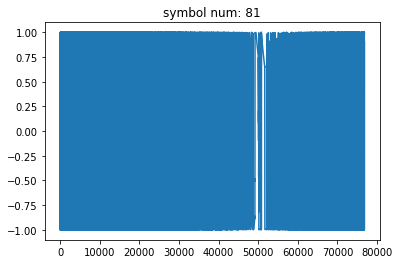

In [26]:
sym.plot()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


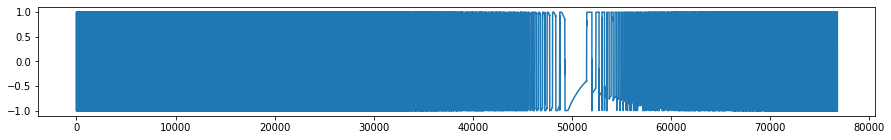

In [49]:
plt.figure(figsize=(15,2))
plt.plot(sym.random_symbol)

# visualize

batches = 3


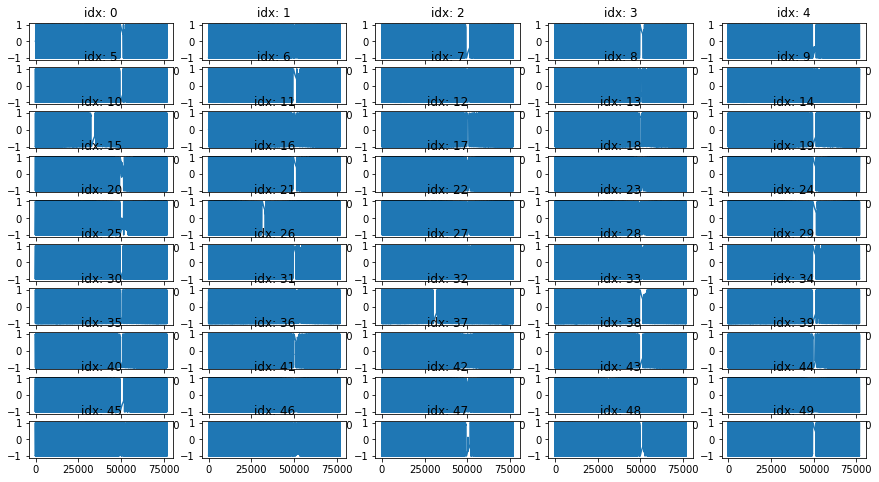

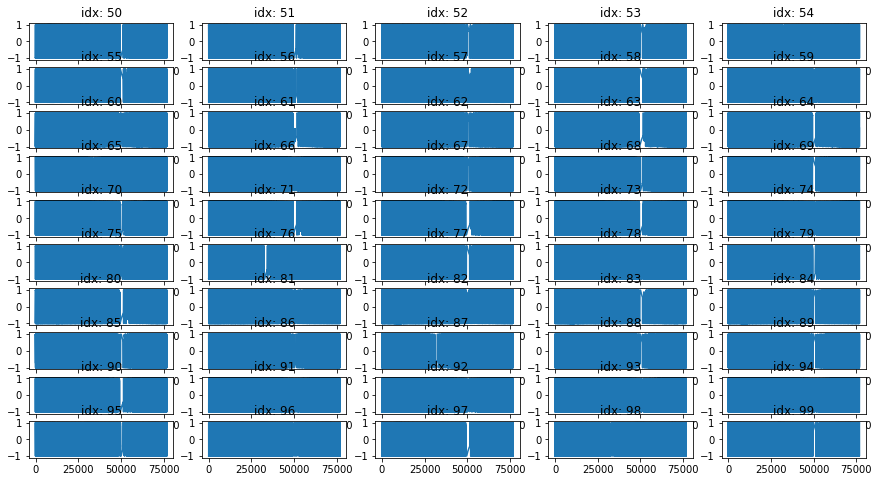

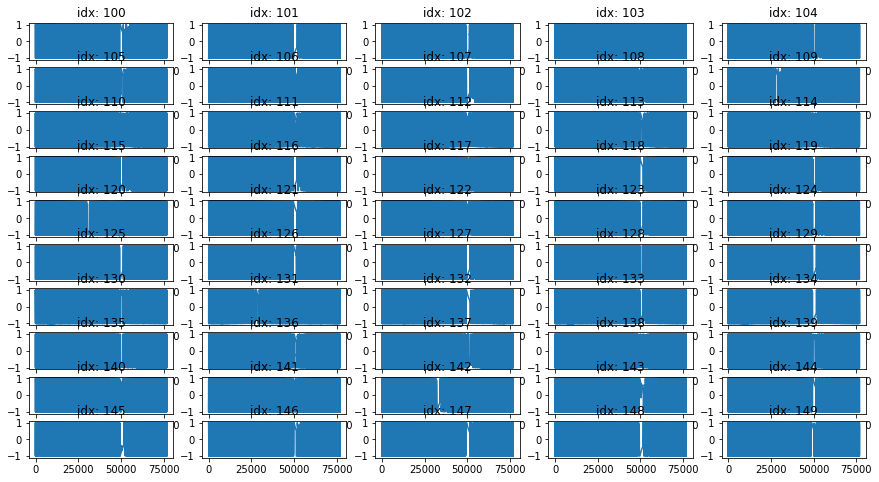

In [27]:
# tar_symbols = _rm_symbols
# tar_symbols = filtered_symbols
tar_symbols = sym.data

batch_size, stop_limit = 50, 8
batches = len(tar_symbols) // batch_size
print(f'batches = {batches}')

stop = 0

for epoch in range(len(tar_symbols) // batch_size):
    rows, cols = 10, 5
    fig, ax = plt.subplots(10, 5, figsize=(15, 8))
    
    for i in range(rows):
        for j in range(cols):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                idx = (epoch * rows * cols) + (cols * i) + j 
                if idx >= len(tar_symbols):
                    break
                ax[i, j].plot(tar_symbols[idx])
                ax[i, j].set_title(f'idx: {idx}')
            
    stop += 1
    if stop > stop_limit:
        break
    

# old dev

## setup

In [ ]:
file = symloader.filter(bw=9, sf=11, att=40)[0]
display(file)
file.load()

pfile = _load_matching_dotp(file.bw, file.sf)
display(pfile)

base_symbol = pfile.to_signal()
display(base_symbol)

In [ ]:
filtered_symbols, conv_vals = filter_symbols(file, thresh_type='quant', plot=False)

In [ ]:
bad_symbols = np.vstack([
    filtered_symbols[15],
    filtered_symbols[16],
    filtered_symbols[20],
    filtered_symbols[99],
    filtered_symbols[100],
    filtered_symbols[101],
    filtered_symbols[110],
    filtered_symbols[111],
])

good_symbols = np.vstack([
    filtered_symbols[0],
    filtered_symbols[5],
    filtered_symbols[8],
    filtered_symbols[71],
    filtered_symbols[1],
    filtered_symbols[3],
    filtered_symbols[29],
    filtered_symbols[30],
])

In [ ]:
plt.plot(conv_vals)

## bad symbol location

In [ ]:
for sym in filtered_symbols[10:20]:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        plt.figure(figsize=(5,1))
        plt.plot(sym)

In [ ]:
sym_df = (
    pd.DataFrame({'good': good_symbol, 'bad': bad_symbol})
    .assign(
        good_abs = lambda df: np.abs(df.good),
        bad_abs = lambda df: np.abs(df.bad),
    )
)
sym_df.head()

## metric exploration

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0].plot(good_symbols[0])
    ax[1].plot(bad_symbols[1])

## convolution

In [ ]:
import scipy as sp
import scipy.stats as spstats
import scipy.signal as spsig

In [ ]:
def _fft_convolve_autocorr(symbol: np.ndarray):
    return spsig.fftconvolve(symbol, symbol[::-1], mode='full')

def _sp_corr(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))
    corr = spsig.correlate(base_symbol, packet_slice)
    return np.abs(corr.max())
    

In [ ]:
good_fftconvs = np.vstack([
    _fft_convolve_autocorr(sym)
    for sym in good_symbols
])

bad_fftconvs = np.vstack([
    _fft_convolve_autocorr(sym)
    for sym in bad_symbols
])

In [ ]:
corr_vals = np.array([
    _sp_corr(base_symbol.data, fftconv)
    for fftconv in np.vstack([good_fftconvs, bad_fftconvs])
])

In [ ]:
_fftconvs = np.vstack([
    _sp_corr(base_symbol.data, _fft_convolve_autocorr(sym))
    for sym in np.vstack([good_symbols, bad_symbols])
])

In [ ]:
corr_vals = np.array([
    _sp_corr(base_symbol.data, fftconv)
    for fftconv in np.vstack([good_fftconvs, bad_fftconvs])
])

In [ ]:
plt.plot(sorted(corr_vals))

In [ ]:
filtered_symbols = [
    sym for sym, corr in zip(np.vstack([good_symbols,bad_symbols]), corr_vals)
    if corr > corr_vals.mean()
]

In [ ]:
len(filtered_symbols)

In [ ]:
idx = 0

In [ ]:
logger.warning(f'\n idx = {idx} '.center(60, '='))

good_fft_corr = _compute_corrcoefs(base_symbol.data, good_fftconvs[idx])
bad_fft_corr = _compute_corrcoefs(base_symbol.data, bad_fftconvs[idx])
good_sp_corr = _sp_corr(base_symbol.data, good_fftconvs[idx])
bad_sp_corr = _sp_corr(base_symbol.data, bad_fftconvs[idx])


fig, ax = plt.subplots(2, 2, figsize=(12, 6))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0,0].plot(good_symbols[idx])
    ax[0,1].plot(bad_symbols[idx])
    ax[1,0].plot(good_fftconvs[idx])
    ax[1,0].set_xlabel(f'good corr: {good_sp_corr:0.6f}')
    ax[1,1].plot(bad_fftconvs[idx])
    ax[1,1].set_xlabel(f'bad corr: {bad_sp_corr:0.6f}')
    

idx += 1

## correlation

In [ ]:
def _compute_corrcoefs(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))

    return np.real(np.abs(
        np.corrcoef(base_symbol[:min_size], packet_slice[:min_size])[0, 1]
    ))

In [ ]:
def _sp_corr(base_symbol: np.ndarray, packet_slice: np.ndarray) -> float:
    min_size = np.min((base_symbol.size, packet_slice.size))
    corr = spsig.correlate(base_symbol, packet_slice)
    return np.abs(corr.max())
    

In [ ]:
good_sp_corr = spsig.correlate(base_symbol.data, good_fftconvs[0])
bad_sp_corr = spsig.correlate(base_symbol.data, bad_fftconvs[0])

fig, ax = plt.subplots(1, 2, figsize=(12, 3))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ax[0].plot(good_sp_corr)
    ax[1].plot(bad_sp_corr)

In [ ]:
_compute_corrcoefs(base_symbol.data, good_fftconv), _compute_corrcoefs(base_symbol.data, bad_fftconv)